LOGISTIC REGRESSION ON HEART ATTACK PREDICTION DATASET


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
## dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [10]:
data = 'heart.csv'
dataset = pd.read_csv(data)

In [11]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
dataset.shape

(303, 14)

In [13]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
##to find whether categorical data is there in dataset
cate=[var for var in dataset.columns if dataset[var].dtype=='O']
print('There are {} categorical data\n'.format(len(cate)))

There are 0 categorical variables



In [16]:
## to ifnd numerical data is there in dataset
numeri=[var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical data\n'.format(len(numeri)))


There are 14 numerical data



In [17]:
dataset[numeri].head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [18]:
## checking whether missing values is there

dataset[numeri].isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
## summary of these values
print(round(dataset[numeri].describe()),2)

         age    sex     cp  trestbps  ...  slope     ca   thal  target
count  303.0  303.0  303.0     303.0  ...  303.0  303.0  303.0   303.0
mean    54.0    1.0    1.0     132.0  ...    1.0    1.0    2.0     1.0
std      9.0    0.0    1.0      18.0  ...    1.0    1.0    1.0     0.0
min     29.0    0.0    0.0      94.0  ...    0.0    0.0    0.0     0.0
25%     48.0    0.0    0.0     120.0  ...    1.0    0.0    2.0     0.0
50%     55.0    1.0    1.0     130.0  ...    1.0    0.0    2.0     1.0
75%     61.0    1.0    2.0     140.0  ...    2.0    1.0    3.0     1.0
max     77.0    1.0    3.0     200.0  ...    2.0    4.0    3.0     1.0

[8 rows x 14 columns] 2


In [21]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


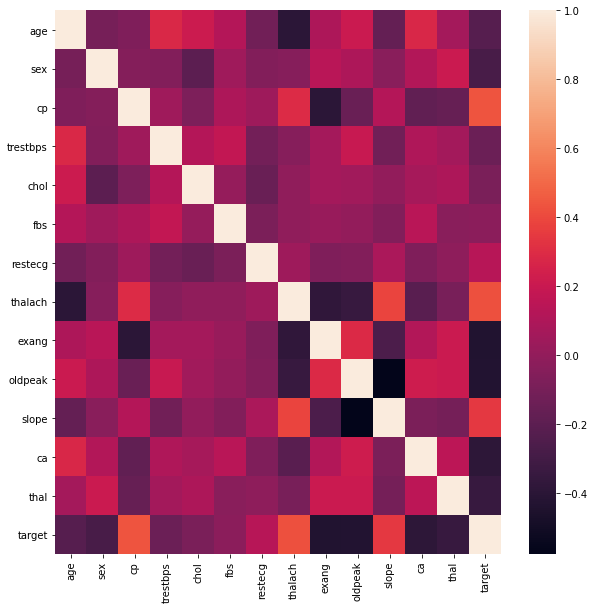

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

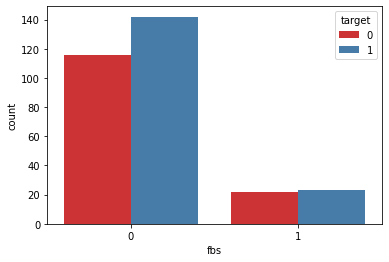

In [25]:
## data visualization
sns.countplot(x='fbs',hue='target',data=dataset,palette="Set1")

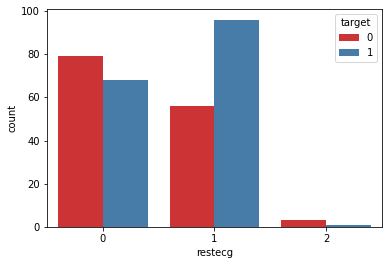

In [26]:
sns.countplot(x='restecg',hue='target',data=dataset,palette="Set1")

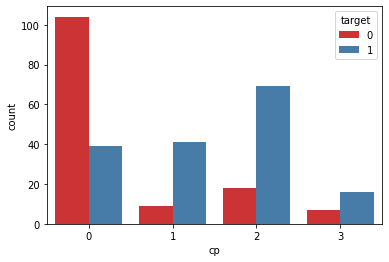

In [28]:
sns.countplot(x='cp',hue='target',data=dataset,palette="Set1")

In [30]:
## we going to predict heart attack with variable chest pain 
## now we are spiting data into separate traning and test set
from sklearn.model_selection import train_test_split
X=dataset.drop('target',axis=1)
y=dataset["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [31]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

In [32]:
## Feature scaling
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.851240,0.673554,0.966942,131.805785,246.760331,0.14876,0.520661,149.826446,0.334711,1.063223,1.409091,0.727273,2.289256
std,8.944421,0.469885,1.050065,17.114924,53.471911,0.35659,0.532732,23.169116,0.472867,1.193764,0.619530,1.030651,0.623709
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,209.250000,0.00000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.00000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,277.750000,0.00000,1.000000,166.000000,1.000000,1.750000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [33]:
##minmaxscaler classifacation
cols=X_train.columns

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
X_train=pd.DataFrame(X_train,columns=[cols])

In [37]:
X_test=pd.DataFrame(X_test,columns=[cols])

In [38]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,0.538567,0.673554,0.322314,0.385773,0.267345,0.14876,0.260331,0.601729,0.334711,0.171488,0.704545,0.181818,0.763085
std,0.186342,0.469885,0.350022,0.174642,0.123492,0.35659,0.266366,0.176863,0.472867,0.192543,0.309765,0.257663,0.207903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.265306,0.180716,0.00000,0.000000,0.484733,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.562500,1.000000,0.333333,0.367347,0.251732,0.00000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.469388,0.338915,0.00000,0.500000,0.725191,1.000000,0.282258,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
##training the models
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg_predict = logreg.predict(X_test)

In [41]:
logreg_predict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [42]:
## now finding accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, logreg_predict)))

Model accuracy score: 0.8361


In [43]:
##comparing training set accuracy with test set accuracy
y_pred_train = logreg.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.8347


In [44]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8347
Test set score: 0.8361


In [47]:
##printing confusion matrix 
from sklearn.metrics import confusion_matrix
logreg_confmat=confusion_matrix(y_test, logreg_predict)
print("confussion matrix")
print(logreg_confmat)

confussion matrix
[[20  7]
 [ 3 31]]


In [49]:
##checking the actual and predicted value
newdatset= pd.DataFrame({'Actual':y_test,'Predicted':logreg_predict})

In [50]:
newdatset

,Actual,Predicted
225,0,0
152,1,1
228,0,1
201,0,0
52,1,0
...,...,...
146,1,1
302,0,1
26,1,1
108,1,1
